In [1]:
from utils import FishEyeImage, rot
from scipy.ndimage import map_coordinates
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, angular_separation, position_angle, offset_by, ICRS
import astropy.units as u
from PIL import Image

file = 'img-z'
img =  Image.open(file+'.jpg')
zhangbei = EarthLocation(lon=115*u.deg+14*u.arcsec,lat=41*u.deg+13*u.arcmin+53*u.arcsec,height = 1466)
dunhuang  = EarthLocation(lon=94.322799*u.deg,lat=40.359581*u.deg,height = 1100)
lenghu = EarthLocation(lon=93.9018774741078*u.deg,lat=38.59868881470391*u.deg,height = 3500)
pic = FishEyeImage(file+'.CR3',loc = zhangbei,mag_limit=6.5)

solution = pic.solve(solve_size=800)

rms = pic.initial_xmatch()

zenith = SkyCoord(alt=0,az=0,unit=u.rad,frame=pic.frame)
def st(pic,theta):
    return theta*pic.lens_para['f']

def re_st(pic, r):
    return r/pic.lens_para['f']

output_fov = 220
output_theta = np.pi*output_fov/180/2
print(output_theta)
output_r = st(pic,output_theta)
print(output_r)
output_size = int(output_r/pic.pixel_size)*2
print(output_size)

output_uv = np.mgrid[0:output_size,0:output_size]
output_uv = np.asarray([output_uv[1],output_uv[0]])

output_xy = output_uv-output_size//2
output_xy.resize((2,output_size*output_size))
print(output_xy.shape)
output_xy = np.dot([[1, 0], [0, -1]], output_xy)
output_xy = rot(output_xy, - np.pi/2)
output_x = output_xy[0]
output_y = output_xy[1]

r = np.sqrt(output_x**2+output_y**2)*pic.pixel_size
pa = np.arctan2(output_y,output_x)
theta = re_st(pic,r)
alt, az = offset_by(0*u.deg,90*u.deg, -pa, theta)

# output_skycoords = SkyCoord(alt,az,frame=pic.frame)
# output_in_im_x,output_in_im_y,_,_ = pic.wcs2xy(alt,az)
# output_in_im_u,output_in_im_v = pic.xy2uv(output_in_im_x,output_in_im_y)

# output = map_coordinates(input=pic.raw,coordinates=[output_in_im_u,output_in_im_v])
# output.resize((output_size,output_size))

# plt.imshow(output,)
# plt.show()

{'ra': 2.4674274958823417, 'dec': 0.7001737837987395, 'eq_roll': 2.9473946807552633}
Using existing star detection data


1.9198621771937625
28.029987787028933
9342
(2, 87272964)


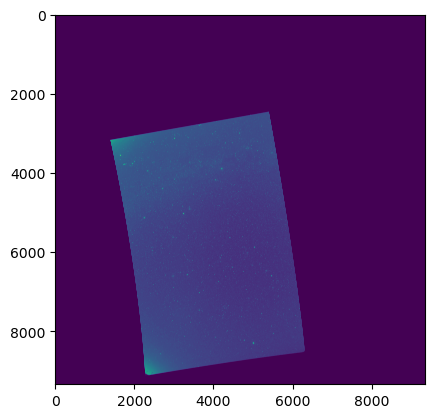

In [2]:
output_in_im_x,output_in_im_y,_,_ = pic.wcs2xy(alt,az)
output_in_im_u,output_in_im_v = pic.xy2uv(output_in_im_x,output_in_im_y)

img =  Image.open(file+'.jpg')
im_data = np.asarray(img)[:,:,1]
output = map_coordinates(input=im_data,coordinates=[output_in_im_u,output_in_im_v])
output.resize((output_size,output_size))

plt.imshow(output,)
plt.show()

In [13]:
output_in_im_u[(9342*9342)//2]

-1572.8520818000452

In [14]:
output_in_im_v[(9342*9342)//2]

1204.4197555868886

In [4]:
output_uv[0]

array([[   0,    1,    2, ..., 9339, 9340, 9341],
       [   0,    1,    2, ..., 9339, 9340, 9341],
       [   0,    1,    2, ..., 9339, 9340, 9341],
       ...,
       [   0,    1,    2, ..., 9339, 9340, 9341],
       [   0,    1,    2, ..., 9339, 9340, 9341],
       [   0,    1,    2, ..., 9339, 9340, 9341]])

In [5]:
pic.obstime

<Time object: scale='utc' format='iso' value=2024-03-13 14:08:58.000>

In [8]:
SkyCoord(0*u.deg,90*u.deg, frame=pic.frame).transform_to('icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (138.55043204, 41.33029829)>

In [9]:
138.55/360*24


9.236666666666668

In [10]:
0.23*60

13.8